In [281]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr



In [175]:
data = pd.read_csv("data_640_validated.csv", encoding='cp1252', encoding_errors="ignore")
age = data['A5']

## locate non numeric values
data['isnumeric'] = pd.to_numeric(data['A5'],errors='coerce').notna()

## get the index of non numeric values
false_indices = data[data['isnumeric'] == False].index

## drop the column with invalid age values
data.drop(index=false_indices, inplace=True)
data.tail()




,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F24,F25,F26,F27,F28,F29,F30,F31,F32,isnumeric
633,252,5/24/2020 22:03,British,EU,Female,Secondary school,A pet,46,White,Married or domestic partnership,...,1,4,4,4,4,1,3,1,1,True
634,328,5/25/2020 4:48,United States,US/Canada,Female,Undergraduate school,Both,48,White,Married or domestic partnership,...,1,5,5,5,5,1,5,3,2,True
635,356,5/25/2020 5:42,British,EU,Female,Graduate school and higher,Both,48,White,Married or domestic partnership,...,2,4,3,4,4,2,3,1,1,True
636,416,5/25/2020 7:29,American,US/Canada,Female,Undergraduate school,A pet,49,White,Widowed,...,1,5,3,5,5,1,4,5,1,True
637,502,5/25/2020 17:34,USA,US/Canada,Female,Undergraduate school,A pet,55,White,Married or domestic partnership,...,1,4,4,5,5,1,5,2,2,True


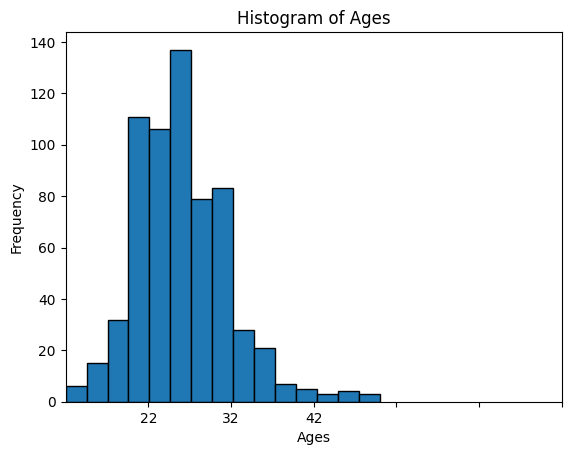

In [165]:
# age_arr = data['A5']

# # Plot histogram with specified bins
# plt.hist(age_arr, bins=15, edgecolor='black')

# # Manually set x-axis ticks to specific locations
# desired_ticks = [10, 20, 30, 40, 50, 60]
# plt.xlim(0, 60)
# plt.xticks(ticks=desired_ticks)

# plt.title('Histogram of Ages')
# plt.xlabel('Ages')
# plt.ylabel('Frequency')
# plt.show()

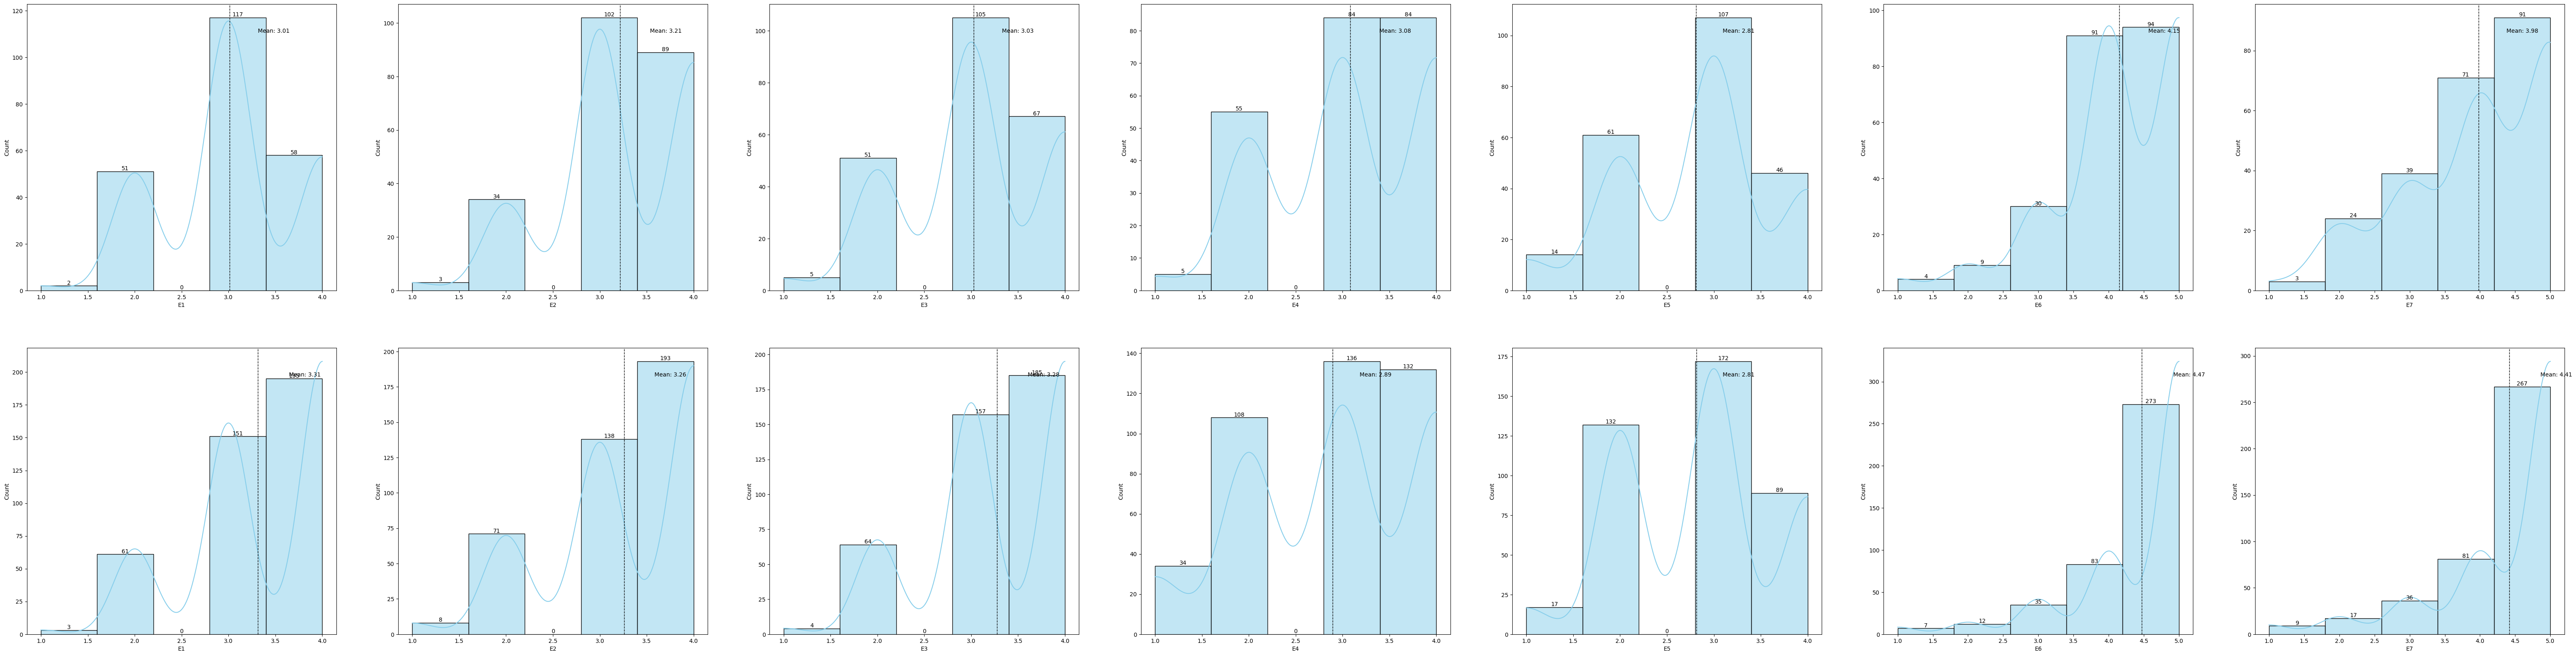

In [260]:
male_data_frame = data[data['A2'] == 'Male']
female_data_frame = data[data['A2'] == 'Female']

fig , ((ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax21,ax22,ax23,ax24,ax25,ax26,ax27)) = plt.subplots(nrows = 2, ncols=7, figsize=(80,20))
averages_male = []
averages_female = []
def plot_histogram_with_distribution(ax, data, column):
    sns.histplot(data[column], bins=5, kde=True, ax=ax, color='skyblue', edgecolor='black')
    
    # Add mean line
    mean_value = data[column].mean()
    ax.axvline(mean_value, color='k', linestyle='dashed', linewidth=1)
    
    # Add mean text annotation
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(mean_value * 1.1, max_ylim * 0.9, f'Mean: {mean_value:.2f}')
    ax.bar_label(ax.containers[0])

# Plot histograms with distribution lines for males
plot_histogram_with_distribution(ax1, male_data_frame, 'E1')
plot_histogram_with_distribution(ax2, male_data_frame, 'E2')
plot_histogram_with_distribution(ax3, male_data_frame, 'E3')
plot_histogram_with_distribution(ax4, male_data_frame, 'E4')
plot_histogram_with_distribution(ax5, male_data_frame, 'E5')
plot_histogram_with_distribution(ax6, male_data_frame, 'E6')
plot_histogram_with_distribution(ax7, male_data_frame, 'E7')

# Plot histograms with distribution lines for females
plot_histogram_with_distribution(ax21, female_data_frame, 'E1')
plot_histogram_with_distribution(ax22, female_data_frame, 'E2')
plot_histogram_with_distribution(ax23, female_data_frame, 'E3')
plot_histogram_with_distribution(ax24, female_data_frame, 'E4')
plot_histogram_with_distribution(ax25, female_data_frame, 'E5')
plot_histogram_with_distribution(ax26, female_data_frame, 'E6')
plot_histogram_with_distribution(ax27, female_data_frame, 'E7')

plt.show()

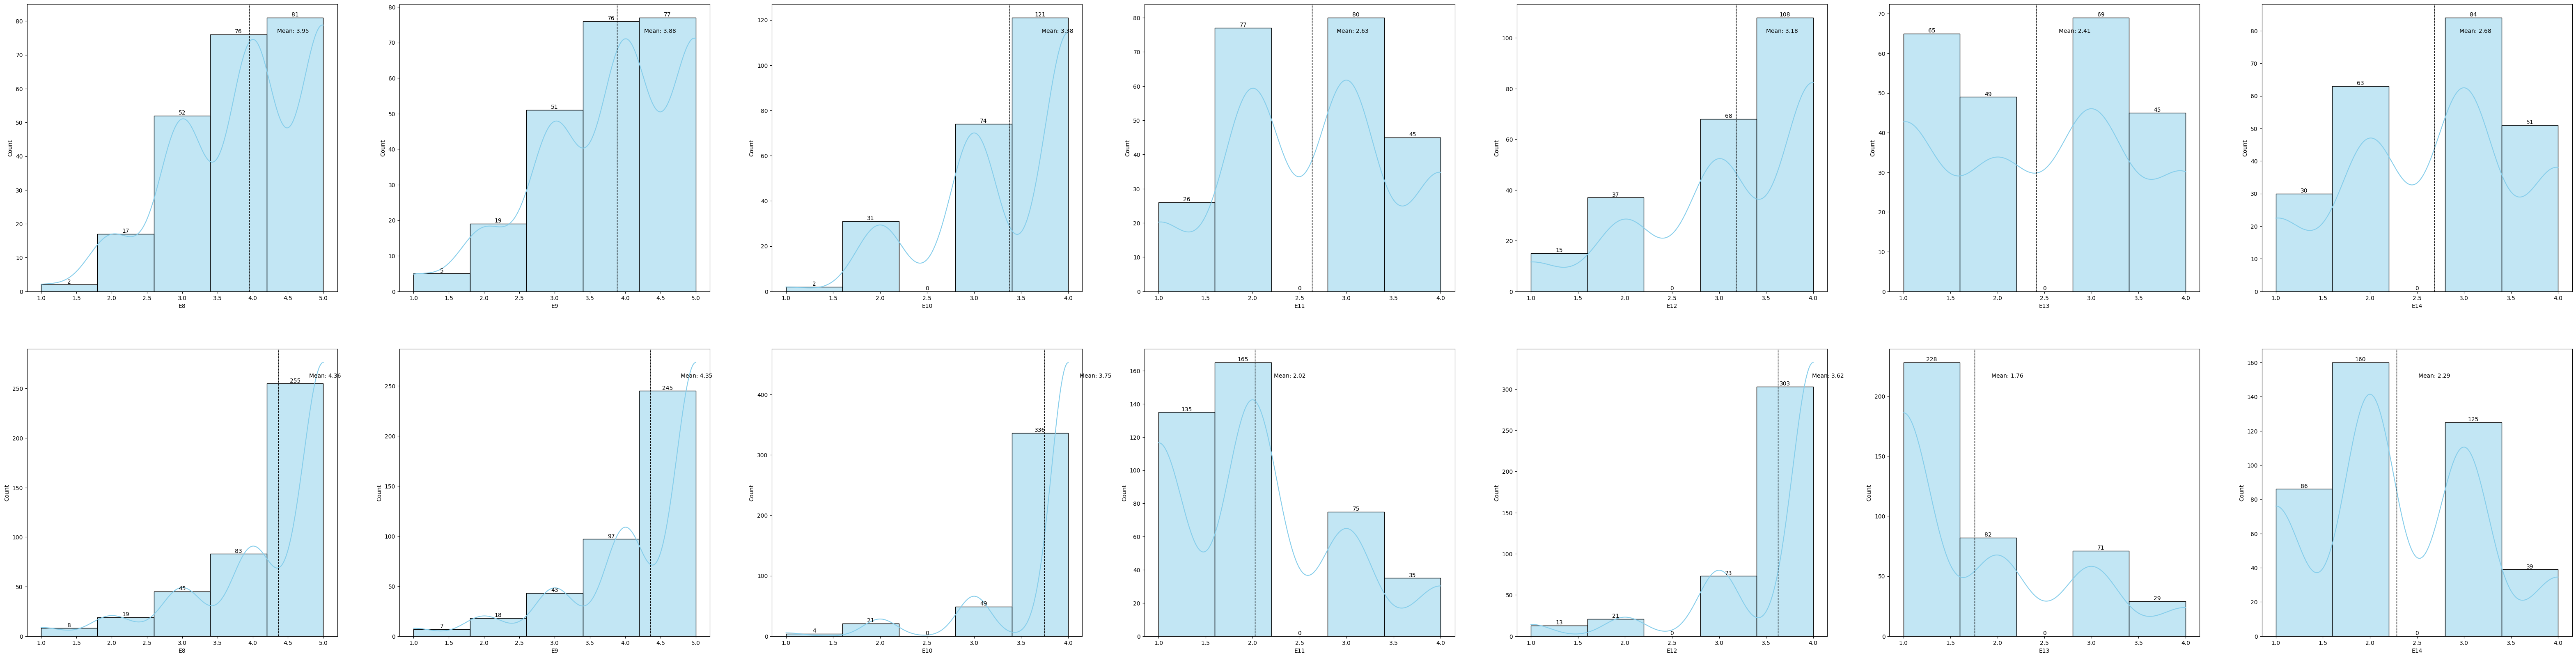

In [261]:
fig2 , ((ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax21,ax22,ax23,ax24,ax25,ax26,ax27)) = plt.subplots(nrows = 2, ncols=7, figsize=(80,20))

plot_histogram_with_distribution(ax1, male_data_frame, 'E8')
plot_histogram_with_distribution(ax2, male_data_frame, 'E9')
plot_histogram_with_distribution(ax3, male_data_frame, 'E10')
plot_histogram_with_distribution(ax4, male_data_frame, 'E11')
plot_histogram_with_distribution(ax5, male_data_frame, 'E12')
plot_histogram_with_distribution(ax6, male_data_frame, 'E13')
plot_histogram_with_distribution(ax7, male_data_frame, 'E14')

# Plot histograms with distribution lines for females
plot_histogram_with_distribution(ax21, female_data_frame, 'E8')
plot_histogram_with_distribution(ax22, female_data_frame, 'E9')
plot_histogram_with_distribution(ax23, female_data_frame, 'E10')
plot_histogram_with_distribution(ax24, female_data_frame, 'E11')
plot_histogram_with_distribution(ax25, female_data_frame, 'E12')
plot_histogram_with_distribution(ax26, female_data_frame, 'E13')
plot_histogram_with_distribution(ax27, female_data_frame, 'E14')

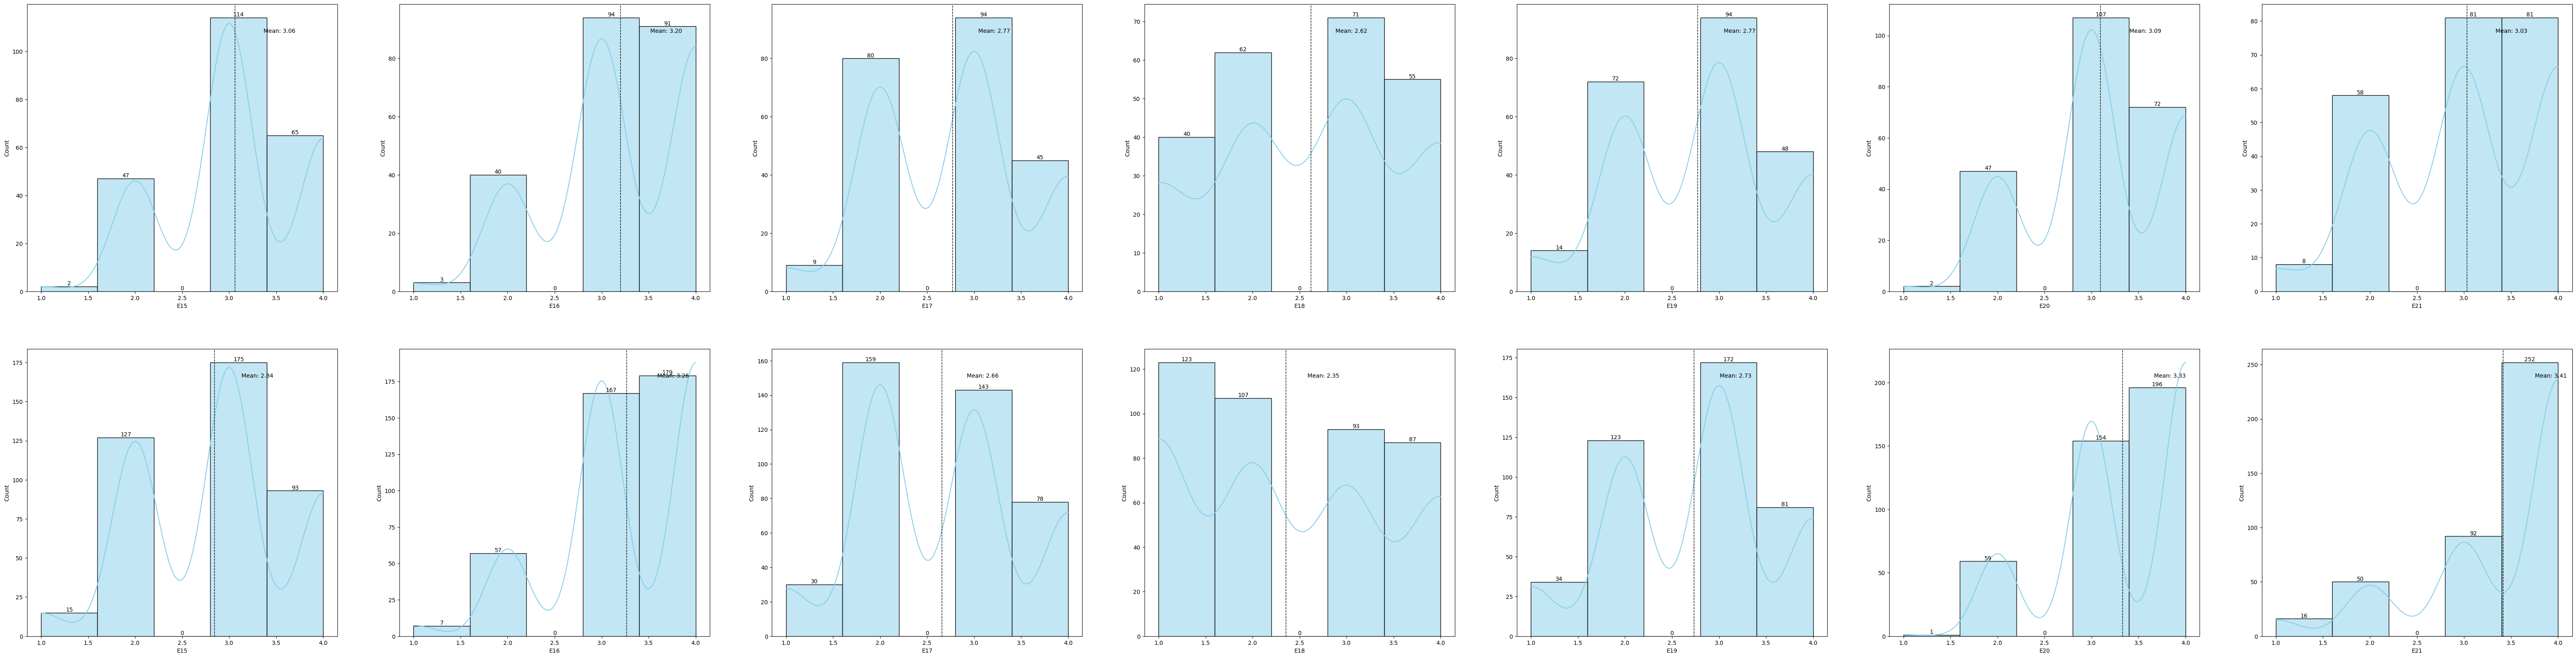

In [285]:
fig3 , ((ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax21,ax22,ax23,ax24,ax25,ax26,ax27)) = plt.subplots(nrows = 2, ncols=7, figsize=(80,20))

plot_histogram_with_distribution(ax1, male_data_frame, 'E15')
plot_histogram_with_distribution(ax2, male_data_frame, 'E16')
plot_histogram_with_distribution(ax3, male_data_frame, 'E17')
plot_histogram_with_distribution(ax4, male_data_frame, 'E18')
plot_histogram_with_distribution(ax5, male_data_frame, 'E19')
plot_histogram_with_distribution(ax6, male_data_frame, 'E20')
plot_histogram_with_distribution(ax7, male_data_frame, 'E21')

# Plot histograms with distribution lines for females
plot_histogram_with_distribution(ax21, female_data_frame, 'E15')
plot_histogram_with_distribution(ax22, female_data_frame, 'E16')
plot_histogram_with_distribution(ax23, female_data_frame, 'E17')
plot_histogram_with_distribution(ax24, female_data_frame, 'E18')
plot_histogram_with_distribution(ax25, female_data_frame, 'E19')
plot_histogram_with_distribution(ax26, female_data_frame, 'E20')
plot_histogram_with_distribution(ax27, female_data_frame, 'E21')

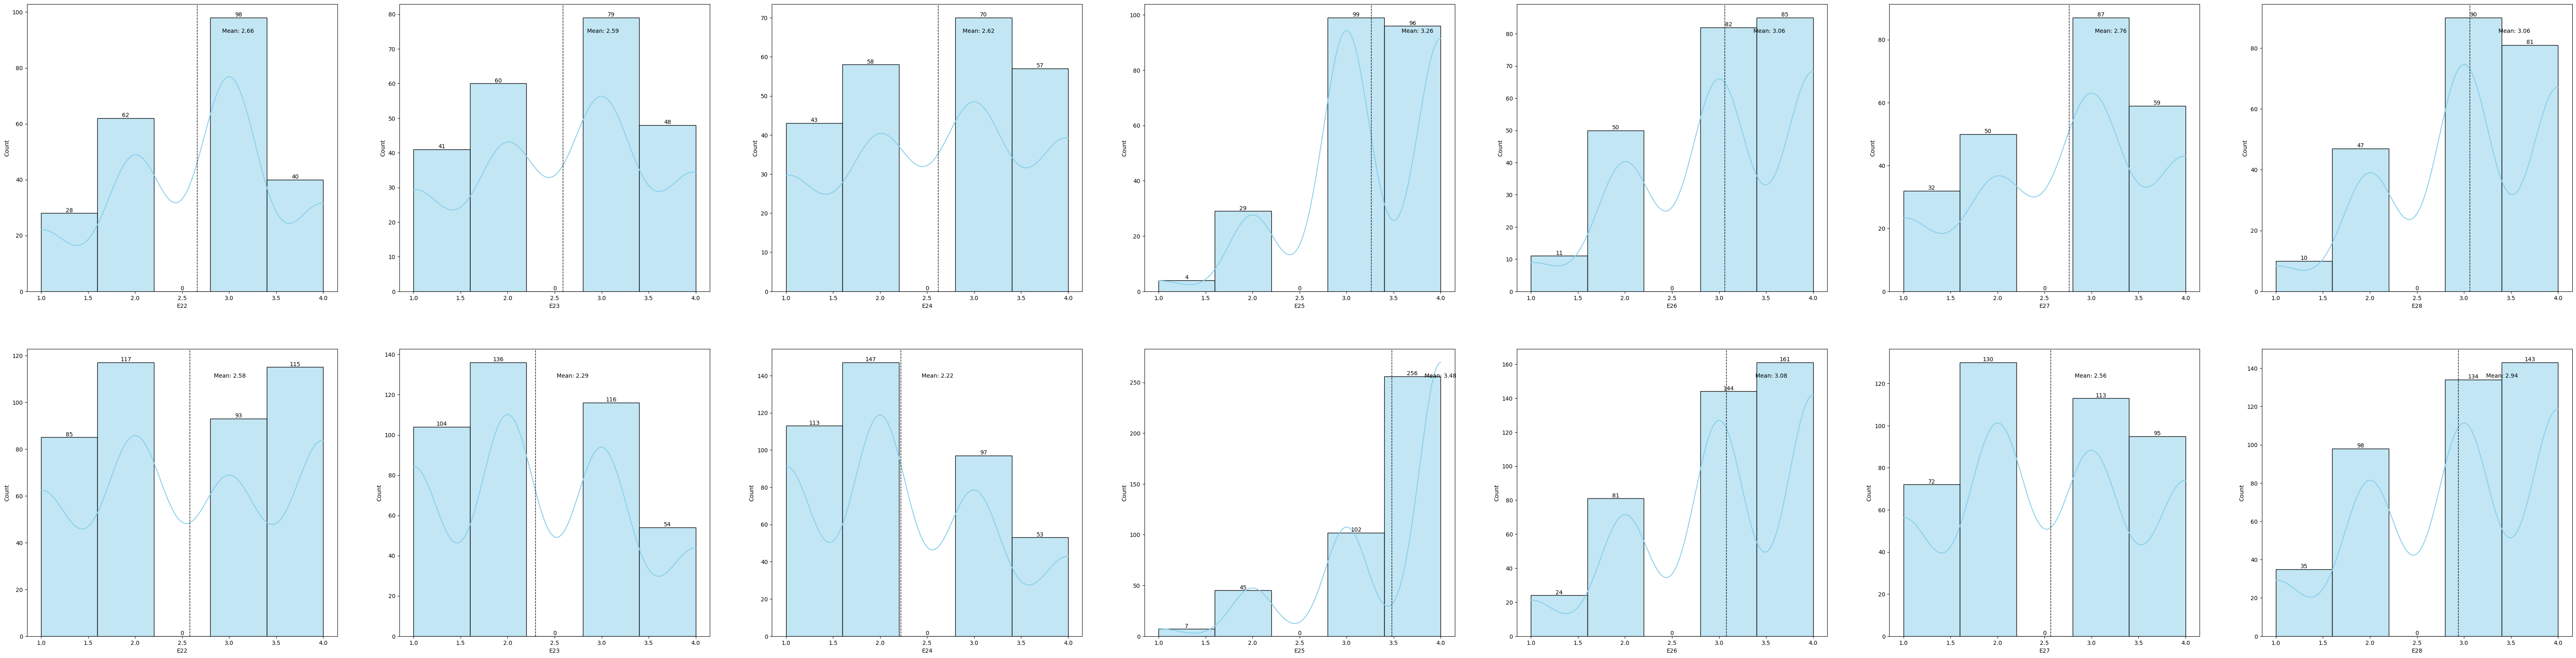

In [254]:
fig4 , ((ax1,ax2,ax3,ax4,ax5,ax6,ax7),(ax21,ax22,ax23,ax24,ax25,ax26,ax27)) = plt.subplots(nrows = 2, ncols=7, figsize=(80,20))

plot_histogram_with_distribution(ax1, male_data_frame, 'E22')
plot_histogram_with_distribution(ax2, male_data_frame, 'E23')
plot_histogram_with_distribution(ax3, male_data_frame, 'E24')
plot_histogram_with_distribution(ax4, male_data_frame, 'E25')
plot_histogram_with_distribution(ax5, male_data_frame, 'E26')
plot_histogram_with_distribution(ax6, male_data_frame, 'E27')
plot_histogram_with_distribution(ax7, male_data_frame, 'E28')

# Plot histograms with distribution lines for females
plot_histogram_with_distribution(ax21, female_data_frame, 'E22')
plot_histogram_with_distribution(ax22, female_data_frame, 'E23')
plot_histogram_with_distribution(ax23, female_data_frame, 'E24')
plot_histogram_with_distribution(ax24, female_data_frame, 'E25')
plot_histogram_with_distribution(ax25, female_data_frame, 'E26')
plot_histogram_with_distribution(ax26, female_data_frame, 'E27')
plot_histogram_with_distribution(ax27, female_data_frame, 'E28')

In [273]:
# Columns to iterate over
columns_to_iterate = [f'C{i}' for i in range(1, 16, 2)]
biggest_difference = []
# Iterate over columns and print means for male and female dataframes
for column in columns_to_iterate:
    print(f"Column: {column}")
    print(f"Male Mean: {male_data_frame[column].mean()}")
    print(f"Female Mean: {female_data_frame[column].mean()}")
    difference = abs(male_data_frame[column].mean() - female_data_frame[column].mean())
    print("Difference: ", difference)
    print()
    
    



Column: C1
Male Mean: 3.776315789473684
Female Mean: 3.7878048780487803
Difference:  0.011489088575096229

Column: C3
Male Mean: 3.9517543859649122
Female Mean: 4.185365853658537
Difference:  0.2336114676936245

Column: C5
Male Mean: 4.12280701754386
Female Mean: 4.458536585365854
Difference:  0.3357295678219945

Column: C7
Male Mean: 4.030701754385965
Female Mean: 4.46829268292683
Difference:  0.4375909285408648

Column: C9
Male Mean: 4.0701754385964914
Female Mean: 4.404878048780488
Difference:  0.3347026101839967

Column: C11
Male Mean: 3.7850877192982457
Female Mean: 3.6341463414634148
Difference:  0.15094137783483097

Column: C13
Male Mean: 3.9342105263157894
Female Mean: 3.8390243902439023
Difference:  0.09518613607188708

Column: C15
Male Mean: 4.171052631578948
Female Mean: 4.426829268292683
Difference:  0.2557766367137351



In [274]:
columns_to_iterate = [f'C{i}' for i in range(2, 15, 2)]
biggest_difference = []
# Iterate over columns and print means for male and female dataframes
for column in columns_to_iterate:
    print(f"Column: {column}")
    print(f"Male Mean: {male_data_frame[column].mean()}")
    print(f"Female Mean: {female_data_frame[column].mean()}")
    difference = abs(male_data_frame[column].mean() - female_data_frame[column].mean())
    print("Difference: ", difference)
    print()

Column: C2
Male Mean: 2.56140350877193
Female Mean: 3.2195121951219514
Difference:  0.6581086863500216

Column: C4
Male Mean: 2.4078947368421053
Female Mean: 2.8585365853658535
Difference:  0.4506418485237482

Column: C6
Male Mean: 2.1052631578947367
Female Mean: 2.178048780487805
Difference:  0.07278562259306831

Column: C8
Male Mean: 2.6535087719298245
Female Mean: 3.5829268292682928
Difference:  0.9294180573384683

Column: C10
Male Mean: 3.017543859649123
Female Mean: 4.11219512195122
Difference:  1.0946512623020968

Column: C12
Male Mean: 2.8464912280701755
Female Mean: 3.9658536585365853
Difference:  1.1193624304664098

Column: C14
Male Mean: 2.4342105263157894
Female Mean: 3.3073170731707315
Difference:  0.8731065468549422



In [296]:
data['A2'] = data['A2'].replace({'Male':1, 'Female':0})
for column in data.columns[14:29]:
    corr_coefficient, p_value = pointbiserialr(data['A2'], data[column])
    print(f"Point-biserial correlation for {column}: {corr_coefficient:.4f}, p-value: {p_value:.4f}")

Point-biserial correlation for C1: -0.0058, p-value: 0.8829
Point-biserial correlation for C2: -0.2933, p-value: 0.0000
Point-biserial correlation for C3: -0.1288, p-value: 0.0011
Point-biserial correlation for C4: -0.2064, p-value: 0.0000
Point-biserial correlation for C5: -0.1885, p-value: 0.0000
Point-biserial correlation for C6: -0.0330, p-value: 0.4058
Point-biserial correlation for C7: -0.2391, p-value: 0.0000
Point-biserial correlation for C8: -0.3420, p-value: 0.0000
Point-biserial correlation for C9: -0.1914, p-value: 0.0000
Point-biserial correlation for C10: -0.4104, p-value: 0.0000
Point-biserial correlation for C11: 0.0678, p-value: 0.0872
Point-biserial correlation for C12: -0.4095, p-value: 0.0000
Point-biserial correlation for C13: 0.0467, p-value: 0.2388
Point-biserial correlation for C14: -0.3413, p-value: 0.0000
Point-biserial correlation for C15: -0.1453, p-value: 0.0002
